In [6]:
import pandas as pd
import statsmodels.api as sm
data = pd.read_excel('./../data/ols_forecasting_inflation_data.xlsx').set_index('date')
y = data['CPI']
x = sm.add_constant(data['M2'])
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     3953.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          4.74e-308
Time:                        13:50:36   Log-Likelihood:                -3862.5
No. Observations:                 784   AIC:                             7729.
Df Residuals:                     782   BIC:                             7738.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.1015      1.643     40.233      0.000      62.876      69.327
M2             0.0135      0.000     62.876      0.000       0.013       0.014
==============================================================================
Omnibus:                     1138.015   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.400
Skew:                          -0.233   Prob(JB):                     7.66e-14
Kurtosis:                       1.723   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
y.corr(data['M2'])

0.9137060942645593

In [8]:
inflation_rate = (data['CPI'] / data['CPI'].shift(12)) - 1 
growth_rate= (data['M2'] / data['M2'].shift(12)) - 1 

x = sm.add_constant(growth_rate.dropna())
y = inflation_rate.dropna()

model = sm.OLS(y, x).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.293
Date:                Tue, 27 Aug 2024   Prob (F-statistic):             0.0700
Time:                        13:50:36   Log-Likelihood:                 1661.7
No. Observations:                 772   AIC:                            -3319.
Df Residuals:                     770   BIC:                            -3310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0344      0.002     16.377      0.000       0.030       0.038
M2             0.0482      0.027      1.815      0.070      -0.004       0.100
==============================================================================
Omnibus:                      207.373   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.733
Skew:                           1.474   Prob(JB):                     1.33e-98
Kurtosis:                       5.307   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Q3. 
Inflation vs Money Growth -> insignificant beta, low R2. 
* Trend analysis by taking the lags and are thus non stationary. Therefore, if there is an underlying trend to both indicators, then the regression attemps to explore that trend which is inappropriate.
* spurious regression with little relation

CPI vs M2 Supply -> significant beta for M2 supply and high R2


<Axes: xlabel='date'>

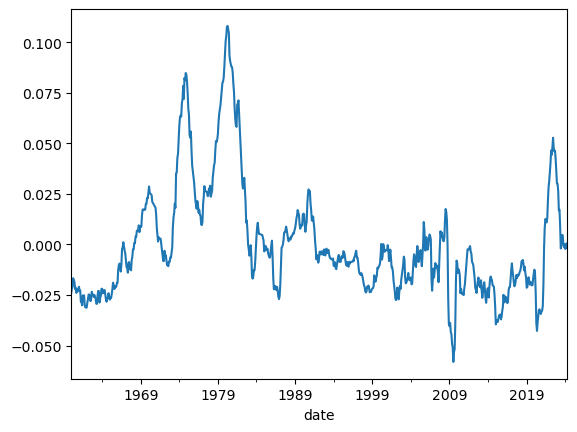

In [10]:
# constant variance of reisiduals and are they serially correlated? 
residuals = model.resid
residuals.plot()

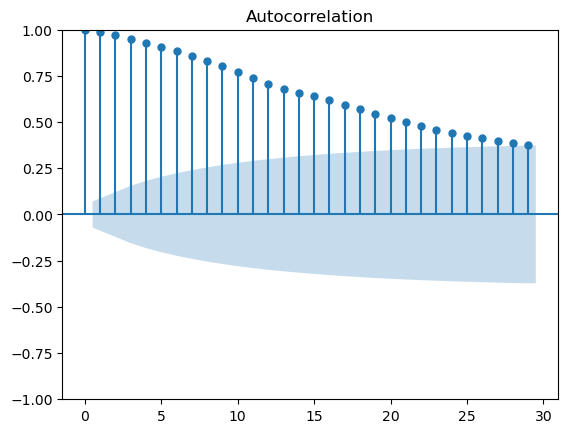

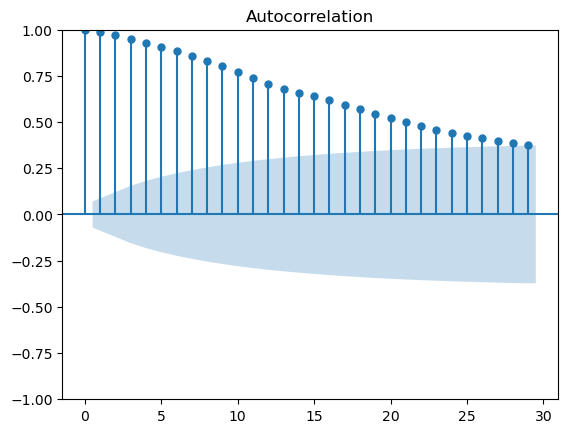

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)

In [12]:
# question 5 


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.293
Date:                Tue, 27 Aug 2024   Prob (F-statistic):             0.0700
Time:                        13:50:36   Log-Likelihood:                 1661.7
No. Observations:                 772   AIC:                            -3319.
Df Residuals:                     770   BIC:                            -3310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0344      0.002     16.377      0.000       0.030       0.038
M2             0.0482      0.027      1.815      0.070      -0.004       0.100
==============================================================================
Omnibus:                      207.373   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.733
Skew:                           1.474   Prob(JB):                     1.33e-98
Kurtosis:                       5.307   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation: alpha is significant but not M2 beta at the 5% level of significance. which can be seen due to the heteroskedastic nature of the data 

In [14]:
# durbin watsons tests for serial correlation
from statsmodels.stats import stattools as st 
print("Durbin Watson test ", st.durbin_watson(residuals, axis=0))
# use the white test to assess 
from statsmodels.stats import diagnostic as d 
print("White test ", d.het_white(residuals, x))

Durbin Watson test  0.019597387785175977
White test  (17.63836881825986, 0.0001478689115993215, 8.990320464730807, 0.0001381976740548027)


The closer the durbin watson test statistic is to 0, it shows a higher likelihood for positive serial correlation 
The white test indicates signs of heteroskedasticity


In [16]:
# Question 7 

lags = [i for i in range(1, 13)]
lags_df = pd.DataFrame(columns = ['beta for growth rate', 'beta for alpha', 'r_squre'])
lags_df['lags'] = lags
lags_df.set_index('lags')
for lag in lags: 
    x = (data['M2'] / data['M2'].shift(lag)) - 1
    y = (data['CPI'] / data['CPI'].shift(lag)) - 1
    
    y = y.dropna() 
    x = sm.add_constant(x.dropna() )
    model = sm.OLS(y, x).fit()
    results = model.summary()
    coef = model.params
    rsquare = model.rsquared
    beta_growth = coef[1]
    alpha = coef[0]

    lags_df.loc[lag, "beta for growth rate"] = beta_growth 
    lags_df.loc[lag, "beta for alpha"] = alpha 
    lags_df.loc[lag, "r**2"] = rsquare 
    
    
lags_df

/var/folders/nl/53zg25ln3zvfjy2zhc99g2yw0000gn/T/ipykernel_3587/4127008036.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_growth = coef[1]
/var/folders/nl/53zg25ln3zvfjy2zhc99g2yw0000gn/T/ipykernel_3587/4127008036.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = coef[0]
/var/folders/nl/53zg25ln3zvfjy2zhc99g2yw0000gn/T/ipykernel_3587/4127008036.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_growth = 

,beta for growth rate,beta for alpha,r_squre,lags,r**2
0,NaN,NaN,NaN,1.0,NaN
1,-0.05574,0.003355,NaN,2.0,0.006931
2,-0.061489,0.006796,NaN,3.0,0.008801
3,-0.053417,0.010092,NaN,4.0,0.006622
4,-0.037582,0.013141,NaN,5.0,0.003208
5,-0.022805,0.016058,NaN,6.0,0.001140
6,-0.009099,0.018859,NaN,7.0,0.000176
7,0.003546,0.021562,NaN,8.0,0.000026
8,0.014757,0.024203,NaN,9.0,0.000438
9,0.024756,0.026789,NaN,10.0,0.001200


In [17]:
lags_df

,beta for growth rate,beta for alpha,r_squre,lags,r**2
0,NaN,NaN,NaN,1.0,NaN
1,-0.05574,0.003355,NaN,2.0,0.006931
2,-0.061489,0.006796,NaN,3.0,0.008801
3,-0.053417,0.010092,NaN,4.0,0.006622
4,-0.037582,0.013141,NaN,5.0,0.003208
5,-0.022805,0.016058,NaN,6.0,0.001140
6,-0.009099,0.018859,NaN,7.0,0.000176
7,0.003546,0.021562,NaN,8.0,0.000026
8,0.014757,0.024203,NaN,9.0,0.000438
9,0.024756,0.026789,NaN,10.0,0.001200


## Models of Volatility - GARCH

In [19]:
data = pd.read_excel('./../data/ols_forecasting_inflation_data.xlsx', sheet_name='s&p500').set_index('Date')
data

,SPY
Date,
1993-02-28,0.010669
1993-03-31,0.022400
1993-04-30,-0.025588
1993-05-31,0.026969
1993-06-30,0.003607
...,...
2024-01-31,0.015926
2024-02-29,0.052187
2024-03-31,0.032702


In [20]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [57]:
# use the different methods to plot 
from arch import arch_model
from arch.univariate import GARCH, EWMAVariance 

spy = data['SPY']
var_1 = (0.15 * (1 / (12**0.5)))**2
theta = 0.97
FREQ = 12
var = (spy**2).shift(1).expanding().mean().to_frame().rename(columns={'SPY':'Expanding Window'})

### Rolling Window
var['Rolling Window'] = (spy**2).shift(1).rolling(5*FREQ).mean() 

GARCH = arch_model(spy, vol='Garch', p=1, o=0, q=1, dist='Normal')

GARCH_model = GARCH.fit()


IGARCH = arch_model(spy)

IGARCH.volatility = EWMAVariance(theta)

IGARCH_model = IGARCH.fit()

var[['GARCH','IGARCH']] = None

### Initialize with the given parameter
var.iloc[0,2:] = var_1 

### Simulate the rest of the period using the initial variance given
for i in range(1, len(var)):
    ### Forecast variance by plugging the GARCH and IGARCH parameters into their respective equations
    var['IGARCH'].iloc[i] = var['IGARCH'].iloc[i-1] * theta + (1-theta)*(spy.iloc[i-1,0]**2)
    var['GARCH'].iloc[i] = GARCH_model.params['omega'] + var['GARCH'].iloc[i-1] * GARCH_model.params['beta[1]'] + GARCH_model.params['alpha[1]']*(spy.iloc[i-1,0]**2)
    
var = var.dropna()

var.tail() * FREQ

vol = (var * FREQ)**.5

vol.plot()
plt.title('Volatility Forecasts')
plt.ylabel('Volatility')

plt.show()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 136905287.20325646
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1044759.9548106429
Iteration:      3,   Func. Count:     24,   Neg. LLF: -669.8186331265372
Iteration:      4,   Func. Count:     30,   Neg. LLF: 9212.798170910562
Iteration:      5,   Func. Count:     40,   Neg. LLF: 537.2601220639692
Iteration:      6,   Func. Count:     49,   Neg. LLF: -669.1535312645367
Iteration:      7,   Func. Count:     55,   Neg. LLF: -678.3262292913266
Iteration:      8,   Func. Count:     61,   Neg. LLF: -667.851868240446
Iteration:      9,   Func. Count:     67,   Neg. LLF: -679.1765228203155
Iteration:     10,   Func. Count:     73,   Neg. LLF: -679.1927990554591
Iteration:     11,   Func. Count:     79,   Neg. LLF: -679.2012046619566
Iteration:     12,   Func. Count:     84,   Neg. LLF: -679.2012683140181
Iteration:     13,   Func. Count:     88,   Neg. LLF: -679.2012683139549
Optimization terminated successfully    (Exit mode 0)


/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00185. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00185. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


IndexingError: Too many indexers